In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 读入数据

In [2]:
f = open('magic04.txt')
data = []
y=[]
for i in f.read().split():
    data.append([float(j)for j in i.split(',')[:-1]])
    y.append(i.split(',')[-1])
    
data = np.array(data) # 原始数据
n = data.shape[0] # 样本个数
m = data.shape[1] # 样本维数

In [39]:
data

array([[-2.44534539e+01, -6.17886622e+00, -1.80116961e-01, ...,
        -8.45242596e+00,  1.24462933e+01, -1.11935226e+02],
       [-2.16465539e+01, -1.04574662e+01, -3.06516961e-01, ...,
        -1.02071260e+01, -2.12848067e+01,  1.14429735e+01],
       [ 1.08801846e+02,  1.13850034e+02,  1.23618304e+00, ...,
        -4.54657260e+01,  4.93142933e+01,  6.29699735e+01],
       ...,
       [ 2.21953461e+01,  2.53495338e+01,  6.23283039e-01, ...,
        -9.71592596e+00,  2.65299332e+00,  6.26985735e+01],
       [ 6.72633461e+01,  5.47208338e+01,  1.16888304e+00, ...,
        -6.40886260e+01,  5.70416933e+01,  2.14498574e+02],
       [ 1.33931246e+02,  3.08204338e+01,  3.84283039e-01, ...,
         3.12257740e+01,  2.50852933e+01,  7.84993735e+01]])

# 计算多元均值向量

In [40]:
s = [0,0,0,0,0,0,0,0,0,0]
for i in range(n):
    s=s+data[i]
mean = s/n
mean

array([-3.31138318e-15, -2.76801598e-15, -1.34166542e-17,  1.21011099e-17,
        5.31252224e-18, -1.25073453e-15, -3.81645877e-15,  3.66478667e-16,
       -2.63315482e-15, -2.34307258e-15])

# 中心化

In [41]:
z=data
for i in range(n):
    z[i]=z[i]-mean
z

array([[-2.44534539e+01, -6.17886622e+00, -1.80116961e-01, ...,
        -8.45242596e+00,  1.24462933e+01, -1.11935226e+02],
       [-2.16465539e+01, -1.04574662e+01, -3.06516961e-01, ...,
        -1.02071260e+01, -2.12848067e+01,  1.14429735e+01],
       [ 1.08801846e+02,  1.13850034e+02,  1.23618304e+00, ...,
        -4.54657260e+01,  4.93142933e+01,  6.29699735e+01],
       ...,
       [ 2.21953461e+01,  2.53495338e+01,  6.23283039e-01, ...,
        -9.71592596e+00,  2.65299332e+00,  6.26985735e+01],
       [ 6.72633461e+01,  5.47208338e+01,  1.16888304e+00, ...,
        -6.40886260e+01,  5.70416933e+01,  2.14498574e+02],
       [ 1.33931246e+02,  3.08204338e+01,  3.84283039e-01, ...,
         3.12257740e+01,  2.50852933e+01,  7.84993735e+01]])

# 使用内积计算得到协方差矩阵

In [42]:
p=np.dot(z.T,z)/n
p

array([[ 1.79468657e+03,  5.98832056e+02,  1.40634899e+01,
        -4.88673783e+00, -2.80023307e+00, -9.24385500e+02,
        -2.58713552e+02,  1.18133866e+01, -9.70630726e+00,
         1.32479447e+03],
       [ 5.98832056e+02,  3.36560086e+02,  6.22077467e+00,
        -2.04502933e+00, -1.17816446e+00, -2.89957100e+02,
        -1.64885064e+02,  1.51852884e+01,  3.16350305e+01,
         4.61761921e+02],
       [ 1.40634899e+01,  6.22077467e+00,  2.23337740e-01,
        -7.35072146e-02, -4.22410108e-02, -4.47284297e+00,
         2.29341395e+00,  1.52113339e-01, -2.30280376e+00,
         1.54346558e+01],
       [-4.88673783e+00, -2.04502933e+00, -7.35072146e-02,
         3.34188897e-02,  1.97252425e-02,  1.21513100e+00,
        -1.13646775e+00, -4.30002400e-02,  1.12267849e+00,
        -4.48542469e+00],
       [-2.80023307e+00, -1.17816446e+00, -4.22410108e-02,
         1.97252425e-02,  1.22119946e-02,  6.55298229e-01,
        -6.69353952e-01, -2.52377277e-02,  6.62872326e-01,
        -2.

# 使用外积计算得到协方差矩阵

In [45]:
sum=np.zeros([m,m])
for i in range(n):
    zi = np.array([z[i]])
    sum=sum+np.dot(zi.T,zi)
q=sum/n    
q

array([[ 1.79468657e+03,  5.98832056e+02,  1.40634899e+01,
        -4.88673783e+00, -2.80023307e+00, -9.24385500e+02,
        -2.58713552e+02,  1.18133866e+01, -9.70630726e+00,
         1.32479447e+03],
       [ 5.98832056e+02,  3.36560086e+02,  6.22077467e+00,
        -2.04502933e+00, -1.17816446e+00, -2.89957100e+02,
        -1.64885064e+02,  1.51852884e+01,  3.16350305e+01,
         4.61761921e+02],
       [ 1.40634899e+01,  6.22077467e+00,  2.23337740e-01,
        -7.35072146e-02, -4.22410108e-02, -4.47284297e+00,
         2.29341395e+00,  1.52113339e-01, -2.30280376e+00,
         1.54346558e+01],
       [-4.88673783e+00, -2.04502933e+00, -7.35072146e-02,
         3.34188897e-02,  1.97252425e-02,  1.21513100e+00,
        -1.13646775e+00, -4.30002400e-02,  1.12267849e+00,
        -4.48542469e+00],
       [-2.80023307e+00, -1.17816446e+00, -4.22410108e-02,
         1.97252425e-02,  1.22119946e-02,  6.55298229e-01,
        -6.69353952e-01, -2.52377277e-02,  6.62872326e-01,
        -2.

# 通过对比发现，这两种不同方法得到的协方差矩阵相同

# 属性1和属性2的余弦相似度

In [46]:
a1 = z[:,0]
a2 = z[:,1]
c = a1.dot(a2)/(a1.dot(a1)*a2.dot(a2))
c

5.2124668408593313e-08

# 属性1和属性2之间的散点图

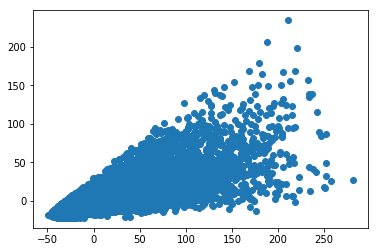

In [52]:
plt.scatter(a1,a2) 

# 方差

In [53]:
vars = [(np.var(z[:,i])) for i in range(m)]

# 最大方差

In [54]:
np.where(vars == np.max(vars))[0][0]

9

# 最小方差

In [55]:
np.where(vars == np.min(vars))[0][0]

4

# 协方差

In [56]:
cov = {}
for i in range(m):
    for j in range(m):
        if i >= j:continue
        cov[''+str(i)+'-'+str(j)]=np.cov(z[:,i],z[:,j])[0][1]
max_cov = min_cov = '0-1'
for (key,value) in  cov.items():
    if value > cov[max_cov]:
        max_cov=key
    if value < cov[min_cov]:
        min_cov=key

# 协方差最大的一对属性是

In [57]:
max_cov

'0-9'

# 协方差最小的一对属性是

In [58]:
min_cov

'0-5'